# Project: Investigate a Dataset - [TMDb movie data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

In this project, we will be analysing data set containing information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. Specifically, we are interested in which genres are most popular from year to year and what kinds of properties are associated with movies that have high revenues.

This dataset contains the following columns:

1. id (identification code for each movie), 

2. imdb_id (the imdb identification code for each movie. IMDb stands for Internet Movie Database - a website that provides information about millions of films and television programs as well as their cast and crew)

3. popularity (which gives an idea of how popular each movie is with respect to the  average ratings of viewers	

4. budget (explains the cost involved in releasing each movie)

5. revenue (itemizes how much income was generated by each movie)

6. original_title	(the actual title of each movie)

7. cast (the main characters in each movie)

8. homepage (contains url addresses to visit website for downloading each movie)

9. director (names of director for each movie)

10. tagline (contains the advertising slogan for each movie)

11. keywords (keywords viewers will encounter and need to know for each movie)

12. overview (a brief summary of what the movie is about)

13. runtime (the length/amount of time involved in viewing each movie)

14. genres (the category of each movie, e.g. Action, Comedy, Adventure, etc)

15. production_companies (the company that released each movie)

16. release_date (date each movie was released)

17. vote_count (the total number of positive feedback reviews)

18. vote_average (the average number of positive feedback reviews)

19. release_year (the year the movie was officially released)

20. budget_adj (adjusted budget values, showing the budget of the associated movie in terms of 2010 dollars, accounting for inflation over time.)

21. revenue_adj (adjusted revenue values, showing the revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.)



### Question(s) for Analysis

Some key questions we will be analysing in-depth include:

1. Which movie genres are most popular from year to year, thus bringing in high revenues (dependent/target variable)? 

2. What kinds of properties (independent/predictor variables) are associated with movies that have high revenues?

In [1]:
# import statements for all of the packages that I plan to use

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties


In [2]:
# to load my dataset and print out the first 5 rows

df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# to obtain information about the number of rows and columns in my dataset

df.shape

(10866, 21)

So, there are 10,866 movies (rows) and 21 columns

In [4]:
# to obtain some statistical details about my data set

df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


The summary statistics results above show the following

1. The average popularity rating is 0.65 or 65%

2. The average revenue accrued from the sale of the movies is greater than the average cost (budget), although a sizeable number of movies do not have a budget nor revenue allocated.

3. Most (50-75%) of the movies were released in the 2000's as upposed to the 90's

4. There are many zero value rows in budget and revenue. We can't have zero budget or revenue for any movie production. These have to be dealt with and cleaned before analysis (EDA) either by removing or replacing them with appropriate values like mean or median.

In [5]:
# to inspect data types and look for instances of missing or possibly errant data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1


### Data Cleaning
 

From the investigation carried out so on the data set so far, the following problems exist:

1. The release_date and release_year columns are not in the correct data types. Both have to be changed to datetime types.  

2. Again, since the actual total number of rows in the data set is 10,866, any column with a total number of non-null rows less than 10,866 has some null-value rows. Hence, a total of 9 out of 21 columns (imdb_id, cast, homepage,	director, tagline, keywords, overview, genres and production_companies) all contain null values, which have to be sorted out.

3. Even though the columns revenue and budget are indicating a complete number of records/rows of 10,866, we do know from the previous investigation with the describe function and from general observation of the data set that a sizeable number of the rows contain zero values. And since it is impossible to have zero budget or revenue for any movie production, these will have to be removed or replaced with appropriate values like mean or median.

Hence, the first thing I am going to do is to use a DROP STATEMENT to drop the columns I am not going to use (homepage, tagline, production_companies and key words since these columns contain too many null values), and include in the statement a clause to retain the other column headers and also  to KEEP/RETAIN the changes.

Then I will again use the HEAD function to see the first 5 rows

In [6]:
df.drop(['homepage', 'tagline', 'keywords', 'production_companies'], axis = 1, inplace = True)
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [7]:
# to inspect the new data set again

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 17 columns):
id                10866 non-null int64
imdb_id           10856 non-null object
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
cast              10790 non-null object
director          10822 non-null object
overview          10862 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(6), object(7)
memory usage: 1.4+ MB


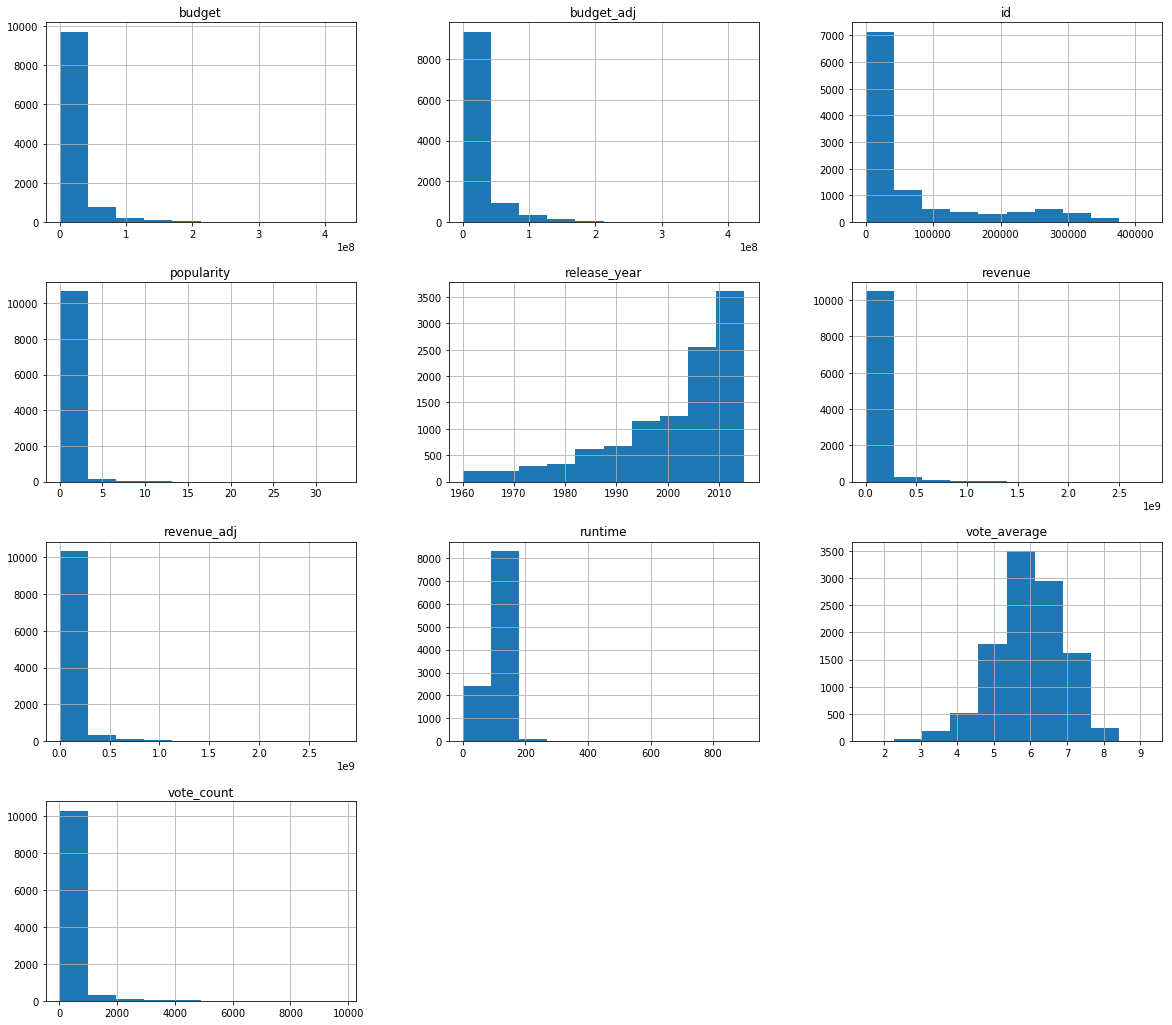

In [8]:
# to look at the histogram of the entire dataframe left

df.hist(figsize=(20,18))
plt.legend()

No results were displayed for any of those columns/fields with object (string) data types, since they are not numerical values. 

However, the results of the histogram show  that most of the columns are skewed to the right (that is, most values/records/movies have a high frequenies compared with a few others which do not)

In [9]:
# Now, instead of dropping the zero-value rows/records of the revenue and budget columns, I used the
# following codes to compute the mean of each column. I used mean because the range/spread of values
# of budget for each movie isn't so far apart, which suggests that mean would be a good representation
# or replacement for each of the zero values

# I then used the INFO function to observe the dataframe again

df.fillna(df.mean(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 17 columns):
id                10866 non-null int64
imdb_id           10856 non-null object
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
cast              10790 non-null object
director          10822 non-null object
overview          10862 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(6), object(7)
memory usage: 1.4+ MB


Now, since all of the 5 columns still having null values (that is, imdb_id, cast, director, overview and genres) are string objects, we cannot find the mean to replace those objects. Thus, i'll just write a statement to reveal where the nulls occur in each column, and then write a final statement to remove those records. Then I will use the INFO function to observe my data set again.

In [10]:
df[df.imdb_id.isnull()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
548,355131,NaN,0.108072,0,0,Sense8: Creating the World,Tuppence Middleton|Bae Doona |Brian J. Smith|A...,NaN,NaN,25,Documentary|Science Fiction,8/10/15,12,7.5,2015,0.000000,0.0
997,287663,NaN,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,Steward Lee|Steven G. Lee,"A Long Time Ago In A Galaxy Far, Far Awayâ€¦ A...",44,NaN,10/3/14,13,6.8,2014,0.000000,0.0
1528,15257,NaN,0.607851,0,0,Hulk vs. Wolverine,Fred Tatasciore|Bryce Johnson|Steve Blum|Nolan...,Frank Paur,Department H sends in Wolverine to track down ...,38,Animation|Action|Science Fiction,1/27/09,38,6.9,2009,0.000000,0.0
1750,101907,NaN,0.256975,0,0,Hulk vs. Thor,Graham McTavish|Fred Tatasciore|Matthew Wolf|J...,Sam Liu,"For ages, Odin has protected his kingdom of As...",41,Action|Animation|Fantasy|Science Fiction,1/27/09,38,6.4,2009,0.000000,0.0
2401,45644,NaN,0.067753,0,0,Opeth: In Live Concert At The Royal Albert Hall,"Mikael Ã…kerfeldt|Martin ""Axe"" Axenrot|Martin ...",NaN,As part of the ongoing celebration of their 20...,163,Music,9/21/10,10,8.6,2010,0.000000,0.0
4797,369145,NaN,0.167501,0,0,Doctor Who: The Snowmen,Matt Smith|Jenna Coleman|Richard E. Grant|Ian ...,NaN,"Christmas Eve, 1892, and the falling snow is t...",60,NaN,12/25/12,10,7.8,2012,0.000000,0.0
4872,269177,NaN,0.090552,0,0,Party Bercy,Florence Foresti,NaN,Florence Foresti is offered Bercy tribute to a...,120,Comedy,9/23/12,15,6.4,2012,0.000000,0.0
6071,279954,NaN,0.004323,500,0,Portal: Survive!,Monique Blanchard|Bradley Mixon,Connor McGuire|Colin McGuire,"A short, live action fan film by Collin and Co...",7,Action|Science Fiction,10/8/13,11,7.5,2013,468.016676,0.0
7527,50127,NaN,0.570337,0,0,Fallen: The Journey,Paul Wesley|Fernanda Andrade|Tom Skerritt|Rick...,Mikael Salomon,"A year later, Aaron is still traveling around ...",80,Action|Adventure|Drama|Fantasy|Family,1/1/07,11,7.3,2007,0.000000,0.0
7809,50128,NaN,0.060795,0,0,Fallen: The Destiny,Paul Wesley|Fernanda Andrade|Tom Skerritt|Rick...,Mikael Salomon,"Aaron and Azazel defeat the Powers, and force ...",80,Adventure|Fantasy|Drama|Action|Science Fiction,1/1/07,13,7.0,2007,0.000000,0.0


In [11]:
df[df.cast.isnull()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
371,345637,tt4661600,0.422901,0,0,Sanjay's Super Team,NaN,Sanjay Patel,Sanjay's Super Team follows the daydream of a ...,7,Animation,11/25/15,47,6.9,2015,0.000000e+00,0.000000e+00
441,355020,tt4908644,0.220751,0,0,Winter on Fire: Ukraine's Fight for Freedom,NaN,Evgeny Afineevsky,A documentary on the unrest in Ukraine during ...,98,Documentary,10/9/15,37,8.2,2015,0.000000e+00,0.000000e+00
465,321109,tt4393514,0.201696,0,0,Bitter Lake,NaN,Adam Curtis,An experimental documentary that explores Saud...,135,Documentary,1/24/15,19,7.8,2015,0.000000e+00,0.000000e+00
536,333350,tt3762974,0.122543,0,0,A Faster Horse,NaN,David Gelb,David Gelb (Jiro Dreams of Sushi) tackles anot...,90,Documentary,10/8/15,12,8.0,2015,0.000000e+00,0.000000e+00
538,224972,tt3983674,0.114264,0,0,The Mask You Live In,NaN,Jennifer Siebel Newsom,"Compared to girls, research shows that boys in...",88,Documentary,1/1/15,11,8.9,2015,0.000000e+00,0.000000e+00
587,319091,tt4185572,0.062536,0,0,The Hunting Ground,NaN,Kirby Dick,From the makers of The Invisible War comes a s...,103,Documentary,2/27/15,39,7.8,2015,0.000000e+00,0.000000e+00
600,332479,tt4550996,0.047256,0,0,Star Wars: TIE Fighter,NaN,Paul Johnson,Paul â€œOtaKingâ€ Johnson drops a real treat i...,7,Science Fiction|Action|Animation,3/24/15,29,7.6,2015,0.000000e+00,0.000000e+00
620,361043,tt5022680,0.129696,0,0,All Hallows' Eve 2,NaN,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,A woman finds a VHS tape on her doorstep that ...,90,NaN,10/6/15,13,5.0,2015,0.000000e+00,0.000000e+00
1088,169607,tt2714900,0.226028,0,1503616,Finding Vivian Maier,NaN,John Maloof|Charlie Siskel,Vivian Maier's photos were seemingly destined ...,83,Documentary,3/28/14,70,7.8,2014,0.000000e+00,1.384967e+06
1173,261041,tt3576038,0.159037,0,0,The Search for General Tso,NaN,Ian Cheney,From New York City to the farmlands of the Mid...,71,Documentary,4/20/14,14,6.9,2014,0.000000e+00,0.000000e+00


In [12]:
df[df.director.isnull()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
532,320996,tt4073952,0.126594,0,0,Iliza Shlesinger: Freezing Hot,Iliza Shlesinger,NaN,Smart and brazen comedian Iliza Shlesinger sha...,71,Comedy,1/23/15,14,6.6,2015,0.000000e+00,0.000000e+00
548,355131,NaN,0.108072,0,0,Sense8: Creating the World,Tuppence Middleton|Bae Doona |Brian J. Smith|A...,NaN,NaN,25,Documentary|Science Fiction,8/10/15,12,7.5,2015,0.000000e+00,0.000000e+00
556,321160,tt3908634,0.100910,0,0,With This Ring,Regina Hall|Jill Scott|Eve|Brooklyn Sudano|Dei...,NaN,After attending their friend Elise's (Sudano) ...,105,Comedy|Romance,1/24/15,14,6.5,2015,0.000000e+00,0.000000e+00
1032,259910,tt3591568,0.291253,0,0,Marvel Studios: Assembling a Universe,Robert Downey Jr.|Chris Hemsworth|Chris Evans|...,NaN,A look at the story behind Marvel Studios and ...,43,TV Movie|Documentary,3/18/14,32,6.3,2014,0.000000e+00,0.000000e+00
1054,253675,tt3711030,0.269468,0,0,Unlocking Sherlock,Benedict Cumberbatch|Martin Freeman|Steven Mof...,NaN,Explore how writers Steven Moffat and Mark Gat...,60,TV Movie|Documentary,1/19/14,11,7.2,2014,0.000000e+00,0.000000e+00
1203,256561,tt3203290,0.119891,150000,0,Free to Play,Benedict Lim|Danil Ishutin|Clinton Loomis,NaN,Follow three professional video game players a...,75,Documentary,3/19/14,40,7.0,2014,1.381637e+05,0.000000e+00
1241,296370,tt3024964,0.135376,0,0,Dance-Off,Kathryn McCormick|Shane Harper|Finola Hughes|C...,NaN,DANCE-OFF is a tongue-in-cheek family comedy s...,0,Romance|Music|Comedy,1/1/14,18,5.7,2014,0.000000e+00,0.000000e+00
1288,301235,tt4217172,0.038364,0,0,Top Gear: The Perfect Road Trip 2,Jeremy Clarkson|Richard Hammond,NaN,In 2013 Jeremy Clarkson and Richard Hammond em...,94,Documentary,11/17/14,12,6.8,2014,0.000000e+00,0.000000e+00
1852,133365,tt1127205,0.256703,0,0,The Diary of Anne Frank,Ellie Kendrick|Kate Ashfield|Geoff Breton|Feli...,NaN,Called the most accurate adaptation of Anne Fr...,100,Drama,1/9/09,19,7.5,2009,0.000000e+00,0.000000e+00
1872,26379,tt1532957,0.091395,3250000,0,Paa,Amitabh Bachchan|Abhishek Bachchan|Vidya Balan...,NaN,He suffers from a progeria like syndrome. Ment...,133,Drama|Family|Foreign,12/4/09,11,6.1,2009,3.303301e+06,0.000000e+00


In [13]:
df[df.overview.isnull()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
548,355131,NaN,0.108072,0,0,Sense8: Creating the World,Tuppence Middleton|Bae Doona |Brian J. Smith|A...,NaN,NaN,25,Documentary|Science Fiction,8/10/15,12,7.5,2015,0.0,0.0
2370,127717,tt1525359,0.081892,0,0,Freshman Father,Britt Irvin|Merrilyn Gann|Barbara Tyson|Anthon...,Michael Scott,NaN,0,NaN,6/5/10,12,5.8,2010,0.0,0.0
3722,85993,tt1680105,0.279647,0,0,Baciato dalla fortuna,Vincenzo Salemme|Asia Argento|Alessandro Gassm...,Paolo Costella,NaN,100,Comedy,9/30/11,13,4.7,2011,0.0,0.0
3794,58253,tt1588335,0.183134,0,0,"Toi, moi, les autres",LeÃ¯la Bekhti|Benjamin Siksou|CÃ©cile Cassel|C...,Audrey Estrougo,NaN,0,Music|Romance,2/22/11,17,5.2,2011,0.0,0.0


In [14]:
df[df.genres.isnull()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
424,363869,tt4835298,0.244648,0,0,Belli di papÃ,Diego Abatantuono|Matilde Gioli|Andrea Pisani|...,Guido Chiesa,"Italian remake of the Mexican 2013 hit, ""We th...",100,NaN,10/29/15,21,6.1,2015,0.00000,0.0
620,361043,tt5022680,0.129696,0,0,All Hallows' Eve 2,NaN,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,A woman finds a VHS tape on her doorstep that ...,90,NaN,10/6/15,13,5.0,2015,0.00000,0.0
997,287663,NaN,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,Steward Lee|Steven G. Lee,"A Long Time Ago In A Galaxy Far, Far Awayâ€¦ A...",44,NaN,10/3/14,13,6.8,2014,0.00000,0.0
1712,21634,tt1073510,0.302095,0,0,Prayers for Bobby,Ryan Kelley|Sigourney Weaver|Henry Czerny|Dan ...,Russell Mulcahy,"True story of Mary Griffith, gay rights crusad...",88,NaN,2/27/09,57,7.4,2009,0.00000,0.0
1897,40534,tt1229827,0.020701,0,0,Jonas Brothers: The Concert Experience,Nick Jonas|Joe Jonas|Kevin Jonas|John Lloyd Ta...,Bruce Hendricks,Secure your VIP pass to a once-in-a-lifetime e...,76,NaN,2/27/09,11,7.0,2009,0.00000,0.0
2370,127717,tt1525359,0.081892,0,0,Freshman Father,Britt Irvin|Merrilyn Gann|Barbara Tyson|Anthon...,Michael Scott,NaN,0,NaN,6/5/10,12,5.8,2010,0.00000,0.0
2376,315620,tt1672218,0.068411,0,0,Doctor Who: A Christmas Carol,Matt Smith|Karen Gillan|Arthur Darvill|Michael...,NaN,Amy Pond and Rory Williams are trapped on a cr...,62,NaN,12/25/10,11,7.7,2010,0.00000,0.0
2853,57892,tt0270053,0.130018,0,0,Vizontele,YÄ±lmaz ErdoÄŸan|Demet Akbag|Altan Erkekli|Cem...,YÄ±lmaz ErdoÄŸan,The story takes place in a small town (called ...,110,NaN,2/2/01,12,7.2,2001,0.00000,0.0
3279,54330,tt1720044,0.145331,0,0,ì•„ê¸°ì™€ ë‚˜,Jang Keun-suk|Song Ha-yoon|Kim Jeong-Nan,Kim Jin-Yeong,Joon-soo (Jang Geun -Seok) is a rebellious hig...,96,NaN,8/13/08,11,6.1,2008,0.00000,0.0
4547,123024,tt2305700,0.520520,0,0,London 2012 Olympic Opening Ceremony: Isles of...,Queen Elizabeth II|Mike Oldfield|Kenneth Brana...,Danny Boyle,The London 2012 Olympic Games Opening Ceremony...,220,NaN,7/27/12,12,8.3,2012,0.00000,0.0


In [15]:
# to drop all records/rows with null values

df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10725 entries, 0 to 10865
Data columns (total 17 columns):
id                10725 non-null int64
imdb_id           10725 non-null object
popularity        10725 non-null float64
budget            10725 non-null int64
revenue           10725 non-null int64
original_title    10725 non-null object
cast              10725 non-null object
director          10725 non-null object
overview          10725 non-null object
runtime           10725 non-null int64
genres            10725 non-null object
release_date      10725 non-null object
vote_count        10725 non-null int64
vote_average      10725 non-null float64
release_year      10725 non-null int64
budget_adj        10725 non-null float64
revenue_adj       10725 non-null float64
dtypes: float64(4), int64(6), object(7)
memory usage: 1.5+ MB


Thus, we have a total of 10,725 non-null values left to work with

Finally, I converted the release_date and release_year columns to the appropriate data type using the syntax in the cell below. Then I checked my results again using the INFO function

In [16]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_year'] = pd.to_datetime(df['release_year'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10725 entries, 0 to 10865
Data columns (total 17 columns):
id                10725 non-null int64
imdb_id           10725 non-null object
popularity        10725 non-null float64
budget            10725 non-null int64
revenue           10725 non-null int64
original_title    10725 non-null object
cast              10725 non-null object
director          10725 non-null object
overview          10725 non-null object
runtime           10725 non-null int64
genres            10725 non-null object
release_date      10725 non-null datetime64[ns]
vote_count        10725 non-null int64
vote_average      10725 non-null float64
release_year      10725 non-null datetime64[ns]
budget_adj        10725 non-null float64
revenue_adj       10725 non-null float64
dtypes: datetime64[ns](2), float64(4), int64(5), object(6)
memory usage: 1.5+ MB


Finally, looking at the genres column, we can see that it is comprised of records having more than one value which are connected using one or more connectors (|). Basically it means the movie includes more than one genre (the 1st genre being the primary genre, the 2nd the secondary genre, and so on in the same order). 

So, I decided to use the primary genres only to study the popular genres over the years.
I used the following code to achieve this

In [17]:
# To split the genres column into two new columns(primary_genre and other_genres)
# and then take a look at the results again for confirmation

df[['primary_genres','other_genres']] = df['genres'].str.split('|', n = 1, expand = True)
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,primary_genres,other_genres
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,1970-01-01 00:00:00.000002015,1.379999e+08,1.392446e+09,Action,Adventure|Science Fiction|Thriller
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,1970-01-01 00:00:00.000002015,1.379999e+08,3.481613e+08,Action,Adventure|Science Fiction|Thriller
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,1970-01-01 00:00:00.000002015,1.012000e+08,2.716190e+08,Adventure,Science Fiction|Thriller


Finally, I used the following code below to drop the other_genres column as it is no longer needed, and then took a glimpse of the results

In [18]:
df.drop(columns = "other_genres", inplace = True)
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,primary_genres
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,1970-01-01 00:00:00.000002015,1.379999e+08,1.392446e+09,Action
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,1970-01-01 00:00:00.000002015,1.379999e+08,3.481613e+08,Action
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,1970-01-01 00:00:00.000002015,1.012000e+08,2.716190e+08,Adventure


With this, my data set looks all clean and ready for Exploratory Data Analysis (EDA)

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Which movie genres are most popular from year to year, thus bringing in high revenues)

The column revenue_adj is my dependent/target variable, while every other column names (with the exception of the revenue field) are my independent/predictor variables. 

Out of all the independent variables, we must identify at least three best predictor variables, and explore the associations amongst them. 

The first question above shows that genre is a good predictor variable to begin with.
Hence, I want to first find out what kind of movie genres are most popular amongst viewers

In [19]:
# To observe the unique values in the primary_genres column

df["primary_genres"].unique()

array(['Action', 'Adventure', 'Western', 'Science Fiction', 'Drama',
       'Family', 'Comedy', 'Crime', 'Romance', 'War', 'Mystery',
       'Thriller', 'Fantasy', 'History', 'Animation', 'Horror', 'Music',
       'Documentary', 'TV Movie', 'Foreign'], dtype=object)

In [20]:
# To count the actual number of unique values in the primary_genres column

df["primary_genres"].nunique()

20

In [21]:
# To observe what kind of movie genres are most popular amongst viewers

df.groupby('primary_genres').popularity.count()

primary_genres
Action             1584
Adventure           584
Animation           374
Comedy             2312
Crime               381
Documentary         387
Drama              2443
Family              142
Fantasy             271
Foreign               8
History              44
Horror              914
Music                95
Mystery             125
Romance             185
Science Fiction     211
TV Movie             74
Thriller            491
War                  58
Western              42
Name: popularity, dtype: int64

So it would seem from the cell above that Drama genre is the most popular.
However, a better clue can be gotten from looking at the average popularity statistics

In [22]:
df.groupby('primary_genres').popularity.mean()

primary_genres
Action             0.838843
Adventure          1.221818
Animation          0.853864
Comedy             0.538372
Crime              0.693807
Documentary        0.184773
Drama              0.554173
Family             0.739779
Fantasy            0.868512
Foreign            0.178917
History            0.764636
Horror             0.468638
Music              0.465062
Mystery            0.596896
Romance            0.707231
Science Fiction    1.087261
TV Movie           0.245873
Thriller           0.673381
War                0.777887
Western            0.690646
Name: popularity, dtype: float64

So, Adventure has the actual highest average popularity. This can be clearly visualised in the bar and pie charts shown below

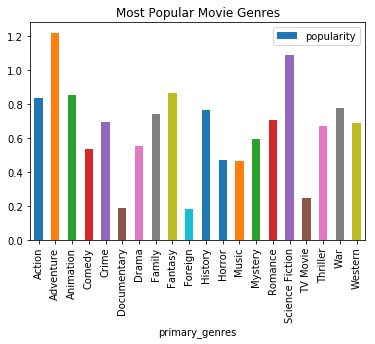

In [23]:
# To obtain 1-D (using only one parameter/column/field) visualisation in a bar
# chart

df.groupby('primary_genres').popularity.mean().plot(kind= 'bar',
title = 'Most Popular Movie Genres')
plt.legend();

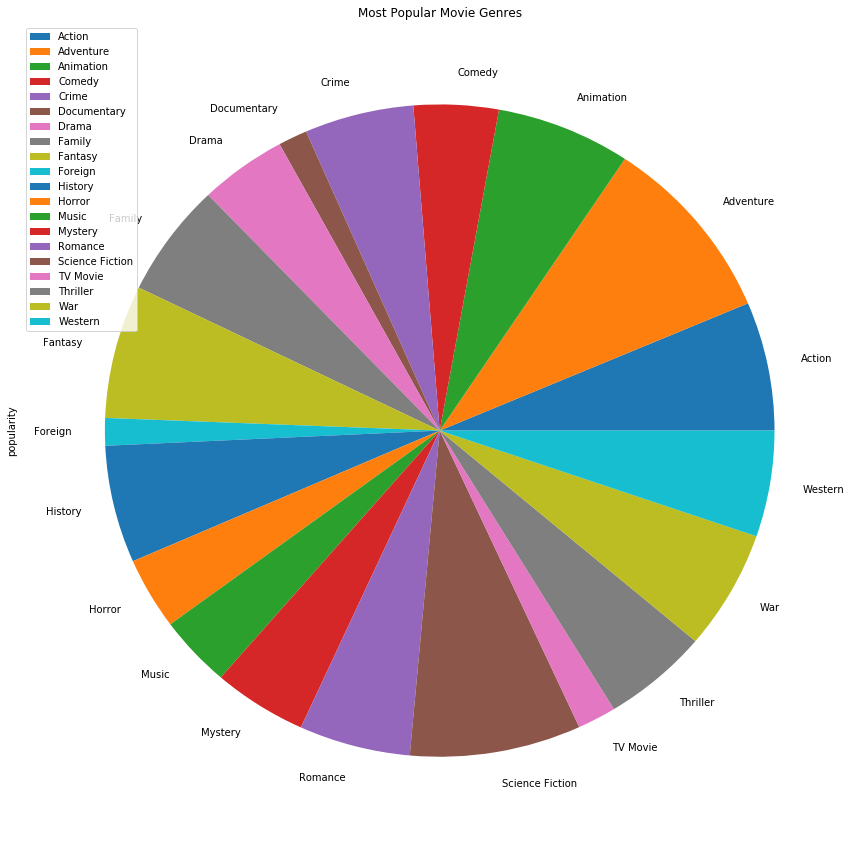

In [24]:
# To obtain 1-D (using only one parameter/column/field) visualisation in a pie
# chart

df.groupby('primary_genres').popularity.mean().plot(kind= 'pie', figsize = (15,15),
title = 'Most Popular Movie Genres')
plt.legend()

# Research Question 2  (What kinds of properties (independent/predictor variables) are associated with movies that have high revenues?)

Next, I tried checking the relationship of each of the other columns to the target column (revenue_adj) using scatter plots

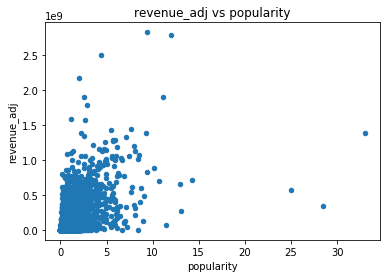

In [25]:
df.plot(x = "popularity", y = "revenue_adj", kind = "scatter", title = 'revenue_adj vs popularity')
plt.legend()

As can be observed in the scatterplot above, some correlation exists between popularity and revenue_adj

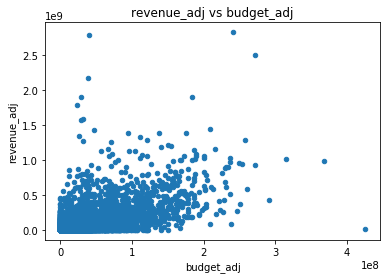

In [26]:
df.plot(x = "budget_adj", y = "revenue_adj", kind = "scatter", title = 'revenue_adj vs budget_adj')
plt.legend()

No correlation exists

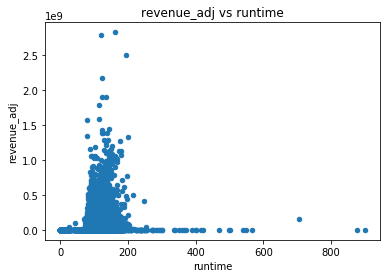

In [27]:
df.plot(x = "runtime", y = "revenue_adj", kind = "scatter", title='revenue_adj vs runtime')
plt.legend()

No correlation exists

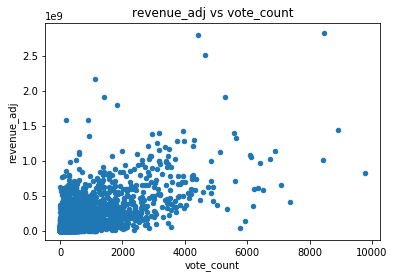

In [28]:
df.plot(x = "vote_count", y = "revenue_adj", kind = "scatter", title='revenue_adj vs vote_count')
plt.legend()

There is positive correlation as seen above

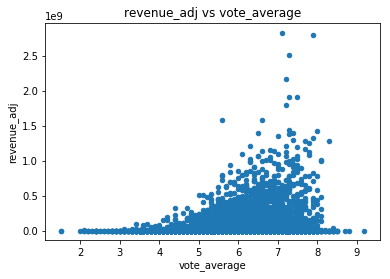

In [29]:
df.plot(x = "vote_average", y = "revenue_adj", kind = "scatter", title='revenue_adj vs vote_average')
plt.legend()

Some positive correlation exists

<a id='conclusions'></a>
## Conclusions

1. So, the genre Adventure has actually been the most popular from year to year

2. Properties that appear to be associated with movies that have high revenues include popularity, budget, vote_count and vote_average.

## Limitations
1. Since during the Data Cleaning stage I ended up using just the primary genres (leaving off the other genres) in order to simplify my analysis, the actual accuracy of my results may have been affected, requiring further investigations

2. There were a significant number of zero-value rows in the budget and revenue columns of our data set, which we ended up sorting out by using the mean of each column to fill them up. We also had to drop some columns from our data set, such that the sample doesn't really represent the population. These may have some impact on and lead to wrong analysis, which will lead to wrong predictions or biased analysis, especially if these results are to be applied to a wider population/sample of data.

3. Furthermore, inferential statistical investigations have not been carried out using machine learning. Thus, the results are at best only tentative and suggestive.

One area of the analysis that could be improved upon is the investigation of the relationships between the non-numeric independent variables and the dependent variable.

In [30]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0